In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.3/709.3 kB 13.3 MB/s eta 0:00:00


In [19]:
import cv2
from ultralytics import YOLO
import numpy as np

model_path = "/content/drive/MyDrive/"+ "yolo_model_for_dataset1" + "/weights/best.pt"
image_path = "/content/drive/MyDrive/"+ "blending_sergeo_perez" + "/input_frames/frame3.jpg"

# Read the image
img = cv2.imread(image_path)
H, W, _ = img.shape

# Load the YOLO model
model = YOLO(model_path)

# Perform inference
results = model(img)

# Initialize a blank mask
combined_mask = np.zeros((H, W), dtype=np.uint8)

# Iterate through each result and combine masks
    # for j, mask in enumerate(result.masks.data):

for result in results:
    for j, mask in enumerate(result.masks.data):
        # Convert mask to appropriate format and resize
        mask = mask.numpy() * 255
        mask = cv2.resize(mask, (W, H))

        # Combine the current mask with the previous ones
        if j==0 or j==1 or j==2 or j==3 or j==5:
          combined_mask = cv2.bitwise_or(combined_mask, mask.astype(np.uint8))

# Save the combined mask
cv2.imwrite('/content/drive/MyDrive/blending_sergeo_perez/mask.png', combined_mask)



0: 384x640 7 logos, 192.7ms
Speed: 2.6ms preprocess, 192.7ms inference, 17.5ms postprocess per image at shape (1, 3, 384, 640)


True

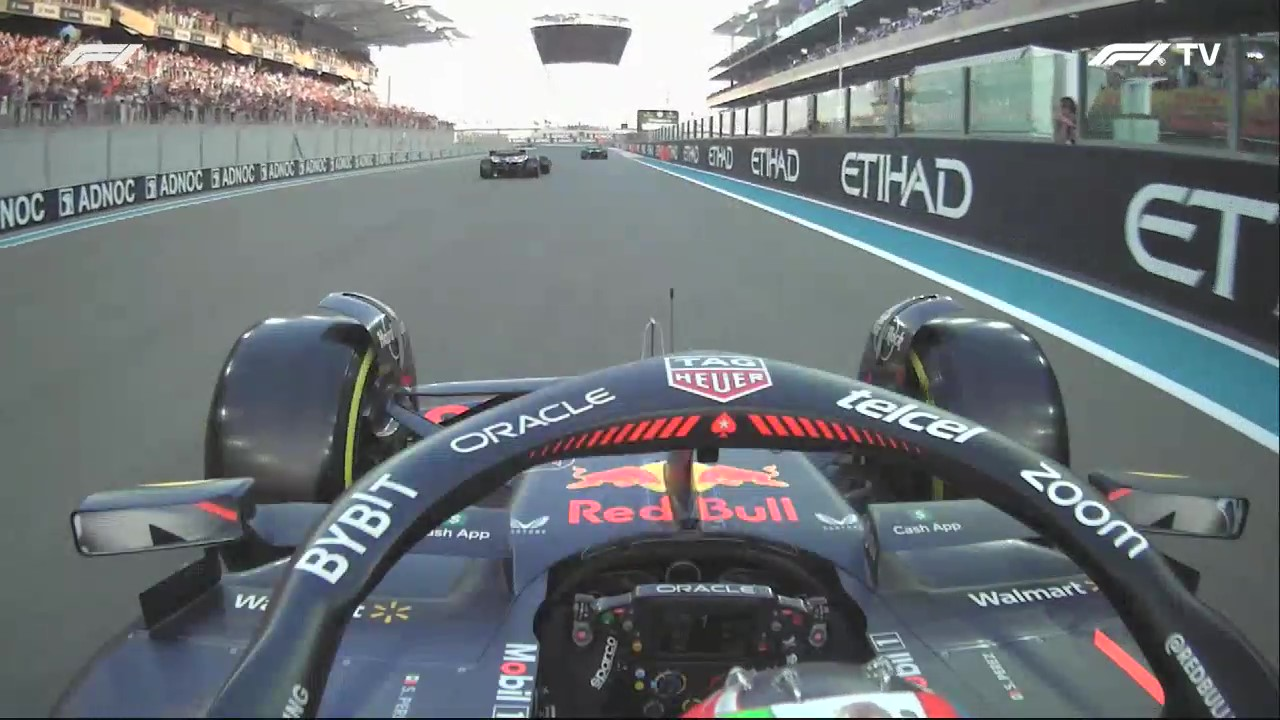

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt
from PIL import Image

# folder_name = "blending_logo_for_blue_car"
# folder_name = "blending_lewis_hamilton"
folder_name = "blending_sergeo_perez"

img = cv2.imread("/content/drive/MyDrive/" + folder_name +"/input_frames/frame3.jpg")
mask = cv2.imread("/content/drive/MyDrive/"+ folder_name +"/mask.png", cv2.IMREAD_GRAYSCALE)

kernel = np.ones((5,5),np.uint8)
dilated_mask = cv2.erode(mask,kernel,iterations = 20)
inpainted_img = cv2.inpaint(img, dilated_mask, 30, cv2.INPAINT_TELEA)
cv2.imwrite("/content/drive/MyDrive/" + folder_name + "/inpainted_img.jpg", inpainted_img)

cv2_imshow(inpainted_img)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np

video_path = "/content/drive/MyDrive/" + folder_name + "/11s trimmed.mp4"
mask_path = "/content/drive/MyDrive/" + folder_name + "/mask.png"

cap = cv2.VideoCapture(video_path)

fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

fourcc = cv2.VideoWriter_fourcc(*'MP4V')
output_path = "/content/drive/MyDrive/"+ folder_name + "/inpainted_video.mp4"
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

while True:
    ret, frame = cap.read()

    if not ret:
        break


    inpainted_frame = cv2.inpaint(frame, mask, 15, cv2.INPAINT_NS)


    out.write(inpainted_frame)


cap.release()
out.release()
